# **1. Introduction to Multi-Armed Bandit (MAB)**

The Multi-Armed Bandit (MAB) problem is a reinforcement learning problem that demonstrates AI agent decision-making ability under uncertainty. It represents the tradeoff between exploration (gathering more information) and exploitation (making the best decision based on current knowledge) to maximize rewards in the long run.


> **Real-World Analogy:**
>
>Imagine you are at a casino with multiple slot machines (each representing an "arm" in Multi Armed Bandit). Each machine provides a reward for the player, but the way machine choose the amount of reward is fully hidden from the player.
>
>Your goal is to maximize your total earnings by deciding which machine to play. If you always play the machine that seems best based on limited experience, you might miss out on an even better machine. On the other hand, if you keep testing all machines indefinitely, you may lose potential rewards.

**Applications of MAB:**
- Online Advertising -- Selecting the best ad to display to maximize click-through rate (CTR).
- A/B Testing -- Finding the most effective design, strategy, or content.
- Recommender Systems -- Choosing the best content or product for users.
- Clinical Trials -- Allocating patients to the most promising treatments.
- Dynamic Pricing -- Adjusting prices dynamically to maximize revenue.
<br><br>



---



# **2. Formal Definition of the Multi-Armed Bandit Problem**

The MAB problem can be formulated mathematically as follows:
- There are K possible actions (arms), denoted as
$A$ = {𝑎1,𝑎2,...,𝑎𝐾}.
- Each arm $a_{i}$ has an unknown reward distribution $R_{i}$.
- At each time step $t$, an agent selects an arm $a_{t}$ and receives a reward $r_{t}$.
- The objective is to maximize the cumulative reward over $T$ time steps.

**Regret in MAB:**
- Regret measures how much reward is lost by not always choosing the optimal arm.
- Cumulative regret at time $T$ is given by:
<br>
\begin{align}
R(T) = \sum_{t=1}^{T} (\mu^* - \mu_{a_t})
\end{align}
<br>
where:

  - $μ^*$ is the expected reward of the best arm.
  - $μ_{a_{t}}$ is the expected reward of the arm chosen at time $t$.

<br>
A good MAB strategy minimizes regret over time by efficiently balancing exploration and exploitation.
<br><br>



---



# **3. Exploration vs. Exploitation Tradeoff**

A key challenge in MAB is deciding between:
- Exploration -- Trying new arms to gather more information about their rewards.
- Exploitation -- Choosing the best-known arm to maximize immediate rewards.

A naive strategy that always exploits (e.g., always picking the best arm observed so far) may get stuck in a suboptimal solution. Conversely, a purely exploratory strategy wastes opportunities for higher rewards.

The goal of MAB algorithms is to find a balance between these two strategies.



---



# **4. Multi-Armed Bandit Algorithms**

There are various strategies for solving the MAB problem. Below are some of the most common ones.

# **Implementation of Upper Confidence Bound 1 (UCB1) Algorithm from scratch**

## Import Libraries

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

## Set hyperparameters

In [ ]:
NUM_OF_ARMS = 3
INITIAL_STEP = NUM_OF_ARMS
NUM_OF_TRIALS = 300

## Define UCB_Bandit Model Class

UCB Bandit Model Class should have all these properties:
- **[Unobserved]** `mean` average number produced when this bandit is chosen
- **[Unobserved]** `variance` variance added to the mean when this bandit is chosen to add uncertainty to the bandit model rewards
- `number_being_selected` variable to record how many times the bandit is chosen
- `sum_of_reward` variable to record the total rewards produced by this bandit
- `ucb_value` variable to count the ucb index used for making decision in choosing bandit


In [ ]:
class UCB_Bandit_Arm:
  def __init__(self, mean, variance):
    # Hidden properties from the user
    self.mean = mean
    self.variance = variance

    self.number_being_selected = 0        # number of times the bandit is selected in total
    self.sum_of_reward = 0                # sum of rewards of the bandit
    self.ucb_value = 0

  def average_rewards(self):
    average_reward = self.sum_of_reward / self.number_being_selected

    return average_reward

  # The agent choose a bandit, so the bandit regenerate number as a reward to be returned
  def roll_a_number(self):
    rand_result = random.gauss(self.mean, math.sqrt(self.variance))

    # print(f'rolled a get number of {rand_result}')

    # Add sum of reward with the rolled number
    self.sum_of_reward += rand_result

    # Increment the number of being selected
    self.number_being_selected += 1

    self.update_ucb_value()

    return rand_result

  def update_ucb_value(self):
    self.ucb_value = self.average_rewards() + math.sqrt(2 * math.log(current_round) / self.number_being_selected)


## Create UCB bandit according to the scenario

In [ ]:
# Bandit empty list
list_bandit_arm = []

# Randomize the mean variance for each of bandits
for i in range(NUM_OF_ARMS):

  # rand_mean = random.randint(0,2)
  rand_mean = random.uniform(0,2)
  rand_var = random.uniform(0,1)

  # Create UCB bandit
  temp_bandit = UCB_Bandit_Arm(rand_mean, rand_var)

  # For debug only
  # print(f'bandit {i} mean      : {temp_bandit.mean}')
  # print(f'bandit {i} variance  : {temp_bandit.variance}')

  # Add each bandit to the list of bandit
  list_bandit_arm.append(temp_bandit)

print(f"{NUM_OF_ARMS} bandits successfully created")

3 bandits successfully created


> HARDCODED SETTING (OPTIONAL)

In [ ]:
# # HARDCODED VERSION
# list_bandit = [
#     UCB_Bandit(mean=1.2, variance=0.5),
#     UCB_Bandit(mean=0.8, variance=1.0),
#     UCB_Bandit(mean=1.5, variance=0.3),
#     UCB_Bandit(mean=1.0, variance=0.8),
#     UCB_Bandit(mean=1.3, variance=0.6),
# ]

As the initial step, we play each bandit at least once.

In [ ]:
current_round = 1
result_history = []

In [ ]:
# Loop for each bandit
for i in range(NUM_OF_ARMS):
  rand_result = list_bandit_arm[i].roll_a_number()
  result_history.append(rand_result)
  # print(rand_result)

  current_round += 1

Run the UCB1 Algorithm for the rest of the number of trials

In [ ]:
for i in range(NUM_OF_TRIALS - NUM_OF_ARMS):
# for i in range(1):

  # Find bandit with the largest UCB Value
  best_bandit_arm_ucb = np.argmax([bandit.ucb_value for bandit in list_bandit_arm])
  # print(f'best bandit UCB: {best_bandit_arm_ucb}')
  # print(f'best bandit UCB: {list_bandit_arm[best_bandit_arm_ucb].ucb_value}')

  rand_result = list_bandit_arm[best_bandit_arm_ucb].roll_a_number()
  result_history.append(rand_result)
  # print(rand_result)

  current_round += 1

The Upper Confidence Bound 1 Algorithm Works perfectly, now for the sake of comparison, let's make a simulation if the bandit uses 100% exploration technique.

In [ ]:
explore_results = []

for i in range(NUM_OF_TRIALS):

  # Randomize which bandit will be chosen
  rand_arm = random.randint(0, NUM_OF_ARMS-1)

  # Roll the bandit
  rand_result = list_bandit_arm[rand_arm].roll_a_number()
  explore_results.append(rand_result)

Let's see the amount of reward we got in cummulative compared to the maximum value we can earn to see the regret level.

Also we will see which one is the best bandit by looking at the parameter or bandit reward average and UCB value.

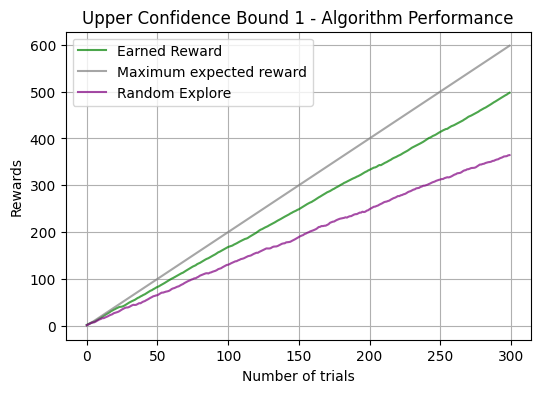

In [ ]:
# UCB1 Result
y1 = np.cumsum(result_history)

# Best possible reward
best_mean = np.argmax([bandit.mean for bandit in list_bandit_arm])
y2 = [i*best_mean for i in range(0,current_round-1)]

# Simulated 100% Explore
y3 = np.cumsum(explore_results)

# Generate x values
x = range(len(y1))

# Plot the lines
plt.figure(figsize=(6, 4))
plt.plot(x, y1, label='Earned Reward', color='green', alpha=0.7)
plt.plot(x, y2, label='Maximum expected reward', color='grey', alpha=0.7)
plt.plot(x, y3, label='Random Explore', color='purple', alpha=0.7)

# Labels and title
plt.xlabel('Number of trials')
plt.ylabel('Rewards')
plt.title('Upper Confidence Bound 1 - Algorithm Performance')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [ ]:
print(f'Current round: {current_round}')

for i in range(NUM_OF_ARMS):
  print(f'Sum of Reward    :{list_bandit_arm[i].sum_of_reward}')
  print(f'Num selected     :{list_bandit_arm[i].number_being_selected}')
  print(f'Average          :{list_bandit_arm[i].average_rewards()}')
  print(f'UCB Value        :{list_bandit_arm[i].ucb_value}')
  print('=================================')

# print(f'arm index to choose for next step: {np.argmax([arm.ucb_value for arm in list_bandit_arm])}')
# print(f'arm index to choose for next step: {np.argmax([arm.average_rewards() for arm in list_bandit_arm])}')

Current round: 301
Sum of Reward    :126.84815653476223
Num selected     :105
Average          :1.2080776812834497
UCB Value        :1.5377849183676435
Sum of Reward    :80.42864861040026
Num selected     :106
Average          :0.7587608359471723
UCB Value        :1.0869091648321123
Sum of Reward    :654.5852646002144
Num selected     :389
Average          :1.6827384694092915
UCB Value        :1.8540349061133299
bandit index to choose for next step: 2
bandit index to choose for next step: 2


Let's validate the result and see the parameter of each bandit's mean and variance.

In [ ]:
print(f'Current round: {current_round}')

for i in range(NUM_OF_ARMS):
  print(f'arm index-{i}')
  print(f'Sum of Reward    :{list_bandit_arm[i].sum_of_reward}')
  print(f'Num selected     :{list_bandit_arm[i].number_being_selected}')
  print(f'Average          :{list_bandit_arm[i].average_rewards()}')
  print(f'UCB Value        :{list_bandit_arm[i].ucb_value}')
  print('====================================')
  print(f'MEAN        :{list_bandit_arm[i].mean}')
  print(f'VARIANCE    :{list_bandit_arm[i].variance}')
  print('====================================')
  print()

print(f'largest mean arm index: {np.argmax([arm.mean for arm in list_bandit_arm])}')

Current round: 301
bandit index-0
Sum of Reward    :126.84815653476223
Num selected     :105
Average          :1.2080776812834497
UCB Value        :1.5377849183676435
MEAN        :1.1740749975821145
VARIANCE    :0.34288800898337146

bandit index-1
Sum of Reward    :80.42864861040026
Num selected     :106
Average          :0.7587608359471723
UCB Value        :1.0869091648321123
MEAN        :0.7651153718420753
VARIANCE    :0.4217111193732561

bandit index-2
Sum of Reward    :654.5852646002144
Num selected     :389
Average          :1.6827384694092915
UCB Value        :1.8540349061133299
MEAN        :1.6669021376789461
VARIANCE    :0.07965824286123213

largest mean bandit index: 2
